In [1]:
import numpy as np
import matplotlib.pyplot as plt

Problem 1
===

I want to begin by finding a moving average of rainfall in the College Park area. I am giving `X`, which is data on the rainfall. I use my kernel `K1` to find the weighted moving average. I can plot the moving average over the base data to see how well it smooths out the data.

In [2]:
# Our data
K1 = np.array([0.06, 0.12, 0.19, 0.25, 0.19, 0.12, 0.06])

X = np.array([0., 0., 0., 3.01, 0.07, 0., 0., 0., 0., 0.02, 1.7, 0.02, 0., 0., 0., 
              0., 0., 0., 0.07, 0.15, 0.36, 0., 0.07, 0., 0.28, 0.12, 0., 0., 0., 
              1.67, 0.1, 0., 0., 0., 0.07, 0.07, 0., 0., 0., 0., 0., 0.02, 0., 
              0.07, 0.28, 0.88, 0.02, 0., 0.25, 1.7, 0., 0., 0., 0., 0., 0., 0., 
              0.02, 1.98, 0., 0., 0.07, 0., 0., 0., 0., 0., 0., 0., 0.07, 0.1, 
              0.61, 0., 0., 0., 0.3, 0.99, 0., 0., 0., 0.37, 4.67, 0., 0., 0., 
              1.07, 0., 2.25, 0.12, 0., 0., 0., 0.1, 0., 0.88, 0.25, 0., 0., 1.01, 2.24])

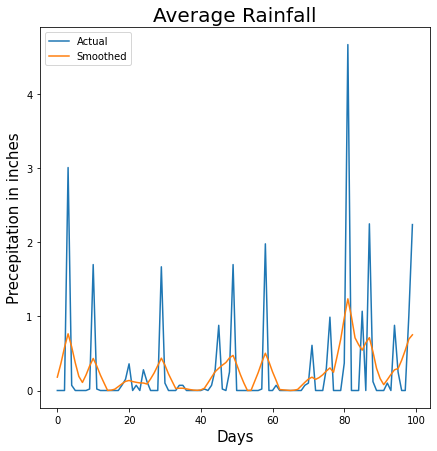

In [3]:
# By using mode 'same', it will keep it the size I want
con_average = np.convolve(K1, X, mode='same')

plt.figure(figsize=(7,7))

# The plotting of the data
plt.plot(range(len(X)), X, label='Actual')
plt.plot(range(len(con_average)), con_average, label='Smoothed')

# My formatting
plt.title("Average Rainfall", fontsize=20)
plt.xlabel("Days", fontsize=15)
plt.ylabel("Precepitation in inches", fontsize=15)
plt.legend()
plt.show()

Problem 2
===

For this problem, I want to find a pattern that is similar to my original `Y`. I will get my kernel K2 by reversing and rotating Y by one position. Then after doing a list convolution, I can find the autocorrelation. 

In [4]:
Y = np.array([1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 
              1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1,
              1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1,
              -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 
              1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1])

In [5]:
# np.flip reverses Y, np.roll will rotate it right by 1
K2 = np.roll(np.flip(Y), 1)

# I am unsure exactly how this works. But it matches the 
# mathematica command ListConvolve[K2, Y, {-51, 51}]. 
# np.tile will duplicate Y for me. By doing valid, it gets only
# the overlap, so the -51 to 51 range. Lastly, I rotated it 51 spots to 
# match the mathematica data
auto = np.roll(np.convolve(K2, np.tile(Y, 2), mode='valid'), len(K2)//2 + 1)

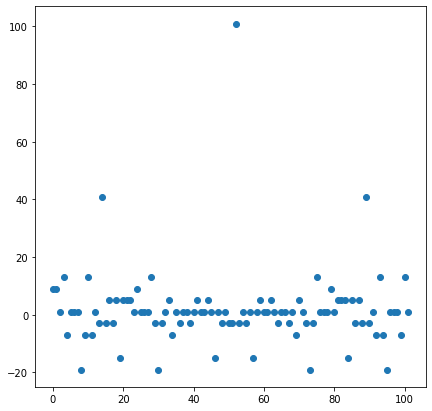

In [6]:
plt.figure(figsize=(7,7))

plt.scatter(range(len(auto)), auto)

plt.show()

By looking at this plot, we can see that our max, 101, is when we have the exact same as Y. The next 2 highest points are the second closest points. The plot has an interesting pattern to it as well, like a recursive triangle like structure. But lets find where the index of the next highest points are. 

In [7]:
# Here, this is the largest 10 points
t = np.sort(auto)
t[-10:]

array([  9,  13,  13,  13,  13,  13,  13,  41,  41, 101])

In [8]:
# This gives the mean so we can center on 0
mean = np.sum(np.argwhere(auto == 41))/2

# Subtract to center on 0
int(np.argwhere(auto == 41)[1][0] - mean)

37

In [9]:
# So we can see Y dot (Y rotated 37) will give us our high value of 41
np.dot(Y, np.roll(Y, 37))

41

Problem 3
===

Now we are doing a type of machine learning problem. We have `Z1` which is a list of vectors, and we want these to map to `Z2`. I want to compare how a dot-layer will compare to a convolution layer. This involves finding out what my dot and convolution layers are, and then comparing their mapping abilities. 

In [10]:
Z1 = np.array([[9, 3, -6, 4, -5, 4], [-5, 5, -3, -5, -1, -9],
               [-9, -4, 4, -7, 6, 8], [3, 6, 4, -1, 6, 5], 
               [6, -4, 6, 2, -5, 7], [-6, 1, -7, 1, 4, 2], 
               [5, 7, -4, -7, 5, -4], [-5, -1, 8, -9, 7, -7],
               [-1, 3, 6, 1, 3, 8], [-4, -7, 4, -1, -8, 2]])

Z2 = np.array([[7, -6, 8, -6], [1, -3, -7, 5], 
               [9, 3, 2, 2], [3, -1, 0, 8], 
               [1, -2, 1, 7], [-6, -8, 9, 9], 
               [4, -3, -4, -4], [-9, -6, 8, 0],
               [-7, 4, -2,  8], [7, 0, -1, 1]])

Part a
---

First, I want to do a least squares solution to `Z1` dot `X3` = `Z2`. I will use `np.linalg.lstsq()`, which also gives the squared error, which I divide by the length of `Z1` to get mean-squared error.

In [11]:
X3, error3a, k, l = np.linalg.lstsq(Z1, Z2, rcond=None)
print("The mean-squared error is", np.round(np.sum(error3a)/Z1.shape[0], decimals=5))

The mean-squared error is 58.49427


Part b
---

Now, I want to make a convolution layer. I will first flatten `Z2` to make `Z3`. Following this, I am given `C3`, the coefficients of symbolic convolutions. I can check my work by comparing `C3` and and convolutions of `Z1`. Then I can computer another least squares error, so I have a comparison.

In [12]:
C3 = np.array([[-6, 3, 9], [4, -6, 3], [-5, 4, -6], [4, -5, 4], 
               [-3, 5, -5], [-5, -3, 5], [-1, -5, -3], [-9, -1, -5], 
               [4, -4, -9], [-7, 4, -4], [6, -7, 4], [8, 6, -7],
               [4, 6, 3], [-1, 4, 6], [6, -1, 4], [5, 6, -1],
               [6, -4, 6], [2, 6, -4], [-5, 2, 6], [7, -5, 2], 
               [-7,1, -6], [1, -7, 1], [4, 1, -7], [2, 4, 1],
               [-4, 7, 5], [-7, -4,  7], [5, -7, -4], [-4, 5, -7], 
               [8, -1, -5], [-9, 8, -1], [7, -9, 8], [-7, 7, -9], 
               [6, 3, -1], [1, 6, 3], [3, 1, 6], [8, 3, 1],
               [4, -7, -4], [-1, 4, -7], [-8, -1, 4], [2, -8, -1]])

**Sub-part b1**

I want to flatten `Z2`. This is a simple numpy command.

In [13]:
Z3 = Z2.flatten()

**Sub-part b2**

Next, I want to ensure C3 is correct. I can check `C3` dot `(c1, c2, c3)` = `Z1` convolved by the kernel `(c1, c2, c3)`. For us, we will use `c1` = 1, `c2` = 2, `c3` = 3.

In [14]:
# I made this function to do 2 dimensional convolutions. It was made using trial and error
# based on knowing it should equal C3.(c1, c2, c3)
def convolution2d(image, kernel):
    convolution = []
    for r in image:
        convolution.append(np.convolve(r, kernel, mode='valid').tolist())

    return np.array(convolution)

In [15]:
# Our test kernel
kernel = np.array([1, 2, 3])

# The left side of the equation to check
left = np.dot(C3, kernel)

# The right side to check
right = convolution2d(Z1, kernel)

# See if they're equivilent
left.reshape(right.shape) == right

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

**Sub-part b3**

And the last part of making the convolution layer is to find the least squared error so I can compare to my other layer

In [16]:
best_fit_kernal, error3b, k, l = np.linalg.lstsq(C3, Z3, rcond=None)

# round to make numbers pretty
temp = np.round(best_fit_kernal, decimals=5)
print("In (c1, c2, c3)...")
print()
print("c1 is:", temp[0])
print()
print("c2 is:", temp[1])
print()
print("c3 is:", temp[2])
print()
print("The mean-squared error is", np.round(np.sum(error3b)/Z2.shape[0], decimals=5))

In (c1, c2, c3)...

c1 is: 0.21298

c2 is: 0.23094

c3 is: 0.03386

The mean-squared error is 110.8946


Part c
---

Now, I want to get a histogram of mean-squared error with 1000 random samples. I will generate 1000 6x4 matricies (the size of `X3` from part 3a) that have values between -1 and 1. Then from here I can calculate mean squared error. Lastly, by plotting I can get a good visualization of how well my error compares to a random error.

In [17]:
# Get 1000 random 6x4 matricies
matricies_list = []

for i in range(1000):
    matricies_list.append(np.random.rand(X3.shape[0], X3.shape[1]))

In [18]:
# Two list comprehensions to get the error

# This one is relatively simple. I dot every random matrix with 
# Z1, then subtract Z2 to get the error
errors = [np.dot(Z1, x) - Z2 for x in matricies_list]

# This is a doozy. So for every error matrix, I square it. This gives me the square of the errors. 
# Next, I can dot it with ones to get the sum of errors. Lastly, I take the mean of this to 
# Get the mean squared error
mean_error_sq = [np.mean(np.dot(x ** 2, np.ones((x.shape[1], 1)))) for x in errors]

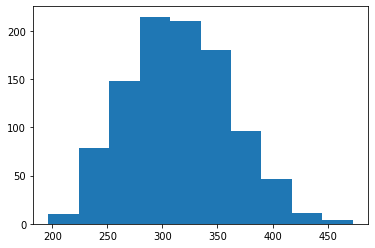

In [19]:
plt.figure()

plt.hist(mean_error_sq)

plt.show()


Part d
---

When comparing a least squared solution (lss) to the convolution solution (cs), one pro for the lss is that is is much easier to compute in Python. However the convolution method is good because of its ability to model with different kernels. A dot layer will be more accurate, but a convolution is a more general solution

Problem 4
===

Lastly, I want to create my own rule for a Continuous Cellular Automaton. While I have high ambitions to one day impliment this in Python, as of submitting this project I was too braindead to do so. So I used the Mathematica commands given. I have copy and pasted them below.

> WMatrix[{w0_, w1_, w2_, w3_}] := 
> w3 (BoxMatrix[3, 7] - BoxMatrix[2, 7]) + 
>  w2 (BoxMatrix[2, 7] - BoxMatrix[1, 7]) + 
>  w1 (BoxMatrix[1, 7] - BoxMatrix[0, 7]) + w0 (BoxMatrix[0, 7])

> WMatrix[{w2_, w3_}] := WMatrix[{1, 1, w2, w3}]

> LCStep[{w2_, w3_}][array_] := 
> UnitStep[ListConvolve[WMatrix[{w2, w3}], array, {1, -1} 4]]

> LCEvolve[{w2_, w3_}, array_, t_] := Nest[LCStep[{w2, w3}], array, t]

> init2 = BlockRandom[SeedRandom[30]; RandomInteger[1, {100, 100}]];

> Manipulate[
> ArrayPlot[LCEvolve[{w2, w3}, init2, 5]], {{w2, -.5}, -1, 
>  1}, {{w3, -.1}, -1, 1}]

After playing around, I really liked the designs that had a large w2 and small w3. Typically around .9, -.9